## Câu hỏi: Thời điểm nào trong ngày có tỉ lệ ô nhiễm không khí cao nhất ?

#### IMPORT

In [26]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#### Đọc dữ liệu

In [15]:
# Load the uploaded file to inspect its content
file_path = './ProcessedData.csv'
data = pd.read_csv(file_path)

In [16]:
# Hiển thị mẫu
data.head(5)

,Unnamed: 0,timestamp,Temprature (Kelvin),Feels like (Kelvin),Pressure (mb),Humidity (%),Temperature Amplitude,Wind speed (m/s),Wind degree,Wind gust (m/s),...,Weather Description,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,0,1701388800,301.16,306.75,1011.0,89.0,0.0,0.51,0.0,0.0,...,scattered clouds,5.0,921.25,128.75,42.50,0.0,56.74,246.02,294.09,29.64
1,1,1701392400,301.16,306.75,1011.0,89.0,0.0,0.51,300.0,0.0,...,scattered clouds,5.0,4699.71,109.08,34.62,0.0,42.44,199.75,233.37,22.29
2,2,1701396000,301.16,306.75,1010.0,89.0,0.0,0.51,0.0,0.0,...,scattered clouds,5.0,3791.81,84.94,26.73,0.0,29.80,157.48,177.82,17.23
3,3,1701399600,300.16,304.35,1009.0,94.0,0.0,0.51,330.0,0.0,...,scattered clouds,5.0,3017.43,61.69,20.91,0.0,22.41,121.27,132.87,13.05
4,4,1701403200,299.16,299.16,1009.0,94.0,0.0,0.51,290.0,0.0,...,mist,5.0,2456.67,46.04,17.82,0.0,19.55,96.76,104.39,10.26


#### Chuyển đổi, lấy giá trị giờ từ timestamp

In [21]:
df = data[['timestamp', 'aqi']].copy()
df['hour'] = df['timestamp'].apply(lambda ts: datetime.fromtimestamp(ts)).dt.hour
df.head(5)

,timestamp,aqi,hour
0,1701388800,5.0,7
1,1701392400,5.0,8
2,1701396000,5.0,9
3,1701399600,5.0,10
4,1701403200,5.0,11


#### Tính trung bình giá trị aqi theo từng giờ

In [35]:
aqi_mean_hourly = df.groupby(df['hour'])['aqi'].mean()

#### Trực quan hoá

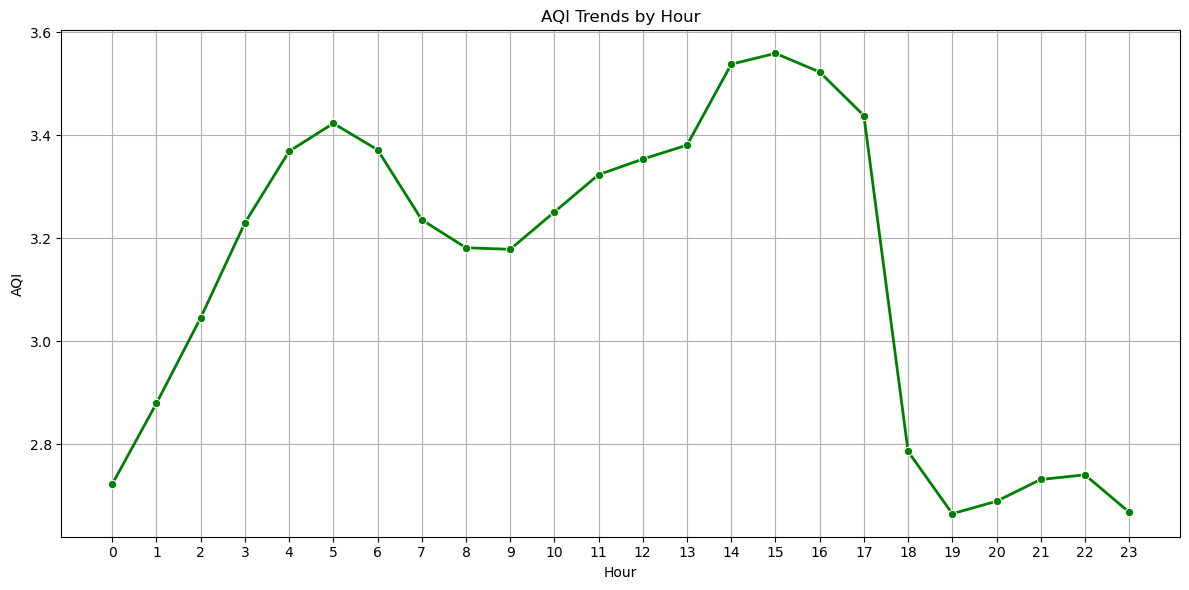

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = aqi_mean_hourly, marker='o', linewidth=2, color='green')
plt.title('AQI Trends by Hour')
plt.xlabel('Hour')
plt.xticks(range(0, 24))
plt.ylabel('AQI')
plt.grid()
plt.tight_layout();

#### Nhận xét

1. **Phân tích:**
   - AQI có xu hướng tăng từ 0h - 17h, sau 17h AQI giảm mạnh.
   - Có 2 thời điểm AQI đạt mức cao nhất:
     - 5h: ~3.4
     - 16h: ~3.55

2. **Ý nghĩa:**
   - Buổi sáng và chiều là thời điểm AQI cao, có thể do các hoạt động giao thông, công việc và điều kiện thời tiết nắng nóng ở thành phố Hồ Chí Minh.
   - Buổi tối, AQI giảm mạnh, cho thấy không khí sạch hơn vào thời điểm này.
